### Key elements:
* a dataset of student grades and other info
 * histograms (w/ & w/o multiple columns)
 * scatter plots (2D & 3D)
* the iris dataset from Scikit-learn
 * parallel coordinate plot
 * Andrews plot
* random data generation
 * correlation coefficients
 * 2D plot of DataFrame
* plot style setting

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#### students' grade dataset

In [2]:
# load data
flc = '/Users/pinqingkan/Desktop/Codes/Course_edX_PythonDataScience/Cached_Datasets/'
fname = flc + 'students.data'
X = pd.read_csv(fname, index_col = 0)
X.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

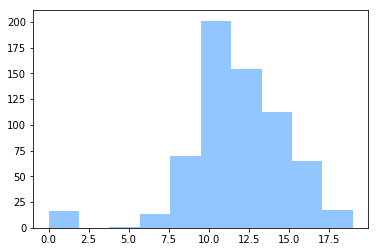

In [3]:
# plot
plt.style.use('seaborn-pastel')
A = X.G3
plt.hist(A)
plt.show()

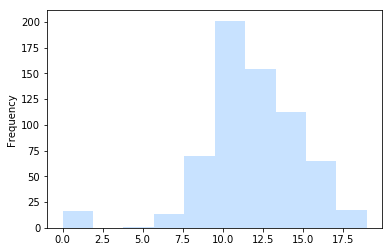

In [4]:
A.plot.hist(alpha = 0.5)
plt.show()

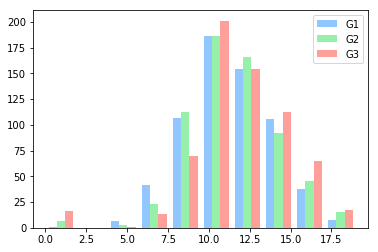

In [5]:
# plot several columns
B = X[['G1', 'G2', 'G3']]
B = B.as_matrix()
plt.hist(B, histtype = 'bar', label = ['G1', 'G2', 'G3'])
plt.legend()
plt.show()

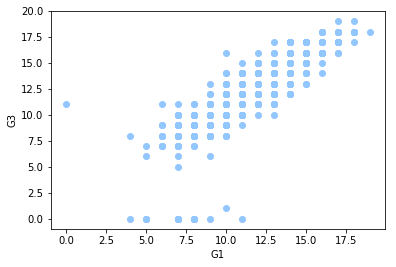

In [6]:
# scatter plot
plt.scatter(X.G1, X.G3)
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

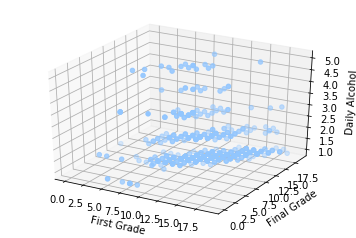

In [7]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('First Grade')
ax.set_ylabel('Final Grade')
ax.set_zlabel('Daily Alcohol')
ax.scatter(X.G1, X.G3, X.Dalc)

plt.show()

#### SKLearn's iris dataset

In [8]:
# plot using SKLean's Iris Dataset
from sklearn.datasets import load_iris
data = load_iris()
Y = pd.DataFrame(data.data, columns = data.feature_names)
# expand the dataframe to include target_names
Y['target_names'] = [data.target_names[i] for i in data.target]

In [9]:
Y.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target_names'],
      dtype='object')

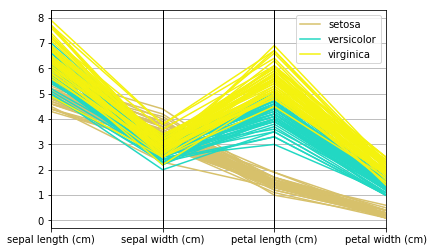

In [10]:
# parallel coordinate plots
from pandas.tools.plotting import parallel_coordinates

plt.figure()
parallel_coordinates(Y, 'target_names')
plt.show()

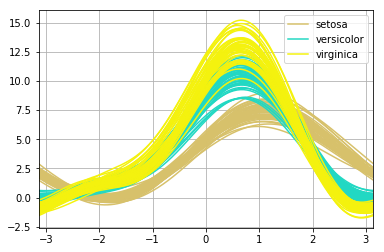

In [11]:
# Andrews chart
# f(t) = y1/sqrt(2) + y2 sin(t) + y3 cos(t) + y4 sin(2t) + y5 cos(2t) + ...
from pandas.tools.plotting import andrews_curves

plt.figure()
andrews_curves(Y, 'target_names')
plt.show()

#### random data generation & correlation

In [12]:
# generate random data and calculate correlation
import numpy as np

Z = pd.DataFrame(np.random.randn(1000, 5), columns = ['a', 'b', 'c', 'd', 'e'])
Zcor = Z.corr()

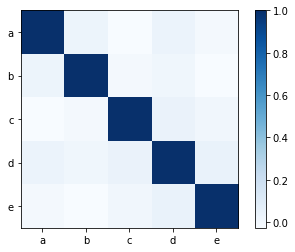

In [13]:
# 2D plot
plt.imshow(Zcor, cmap = plt.cm.Blues)
plt.colorbar()
tick_marks = [i for i in range(len(Z.columns))]
plt.xticks(tick_marks, Z.columns)
plt.yticks(tick_marks, Z.columns)
plt.show()